In [ ]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# Endpoint de CoinGecko para obtener las criptomonedas
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',  # Ordenar por capitalización de mercado
    'per_page': 1000,  # Obtener 1000 criptomonedas
    'page': 1
}

# Obtener los datos
response = requests.get(url, params=params)
data = response.json()

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data)

In [17]:
# Definir categorías manualmente para las criptomonedas seleccionadas
def categorize_crypto(crypto_id):
    if 'ai' in crypto_id:  # Criptomonedas relacionadas con IA
        return 'Inteligencia Artificial'
    elif 'game' in crypto_id or 'enjin' in crypto_id:  # Criptomonedas de videojuegos
        return 'Videojuego'
    elif 'real-estate' in crypto_id or 'real' in crypto_id:  # Criptomonedas de RWA
        return 'RWA'
    elif 'dogecoin' in crypto_id or 'shiba' in crypto_id:  # Criptomonedas meme
        return 'Memes'
    else:
        return 'Otro'

# Aplicar la categorización
df['category'] = df['id'].apply(categorize_crypto)

# Filtrar solo las criptomonedas en las categorías seleccionadas
df_filtered = df[df['category'].isin(['Inteligencia Artificial', 'Videojuego', 'RWA', 'Memes'])]

# Mostrar las primeras filas del DataFrame filtrado
print(df_filtered[['id', 'symbol', 'current_price', 'market_cap', 'total_supply', 'category']].head())

# Guardar el dataset filtrado como un CSV (opcional)
df_filtered.to_csv("cryptos_filtered.csv", index=False)


                                      id   symbol  current_price   market_cap  \
7                               dogecoin     doge       0.170045  25336046957   
13                             chainlink     link      13.860000   9103469607   
20                             shiba-inu     shib       0.000013   7446594388   
26  binance-bridged-usdt-bnb-smart-chain  bsc-usd       1.002000   5184143038   
36                                   dai      dai       0.999873   3284713021   

    total_supply                 category  
7   1.491301e+11                    Memes  
13  1.000000e+09  Inteligencia Artificial  
20  5.895044e+14                    Memes  
26  5.184994e+09  Inteligencia Artificial  
36  3.285206e+09  Inteligencia Artificial  


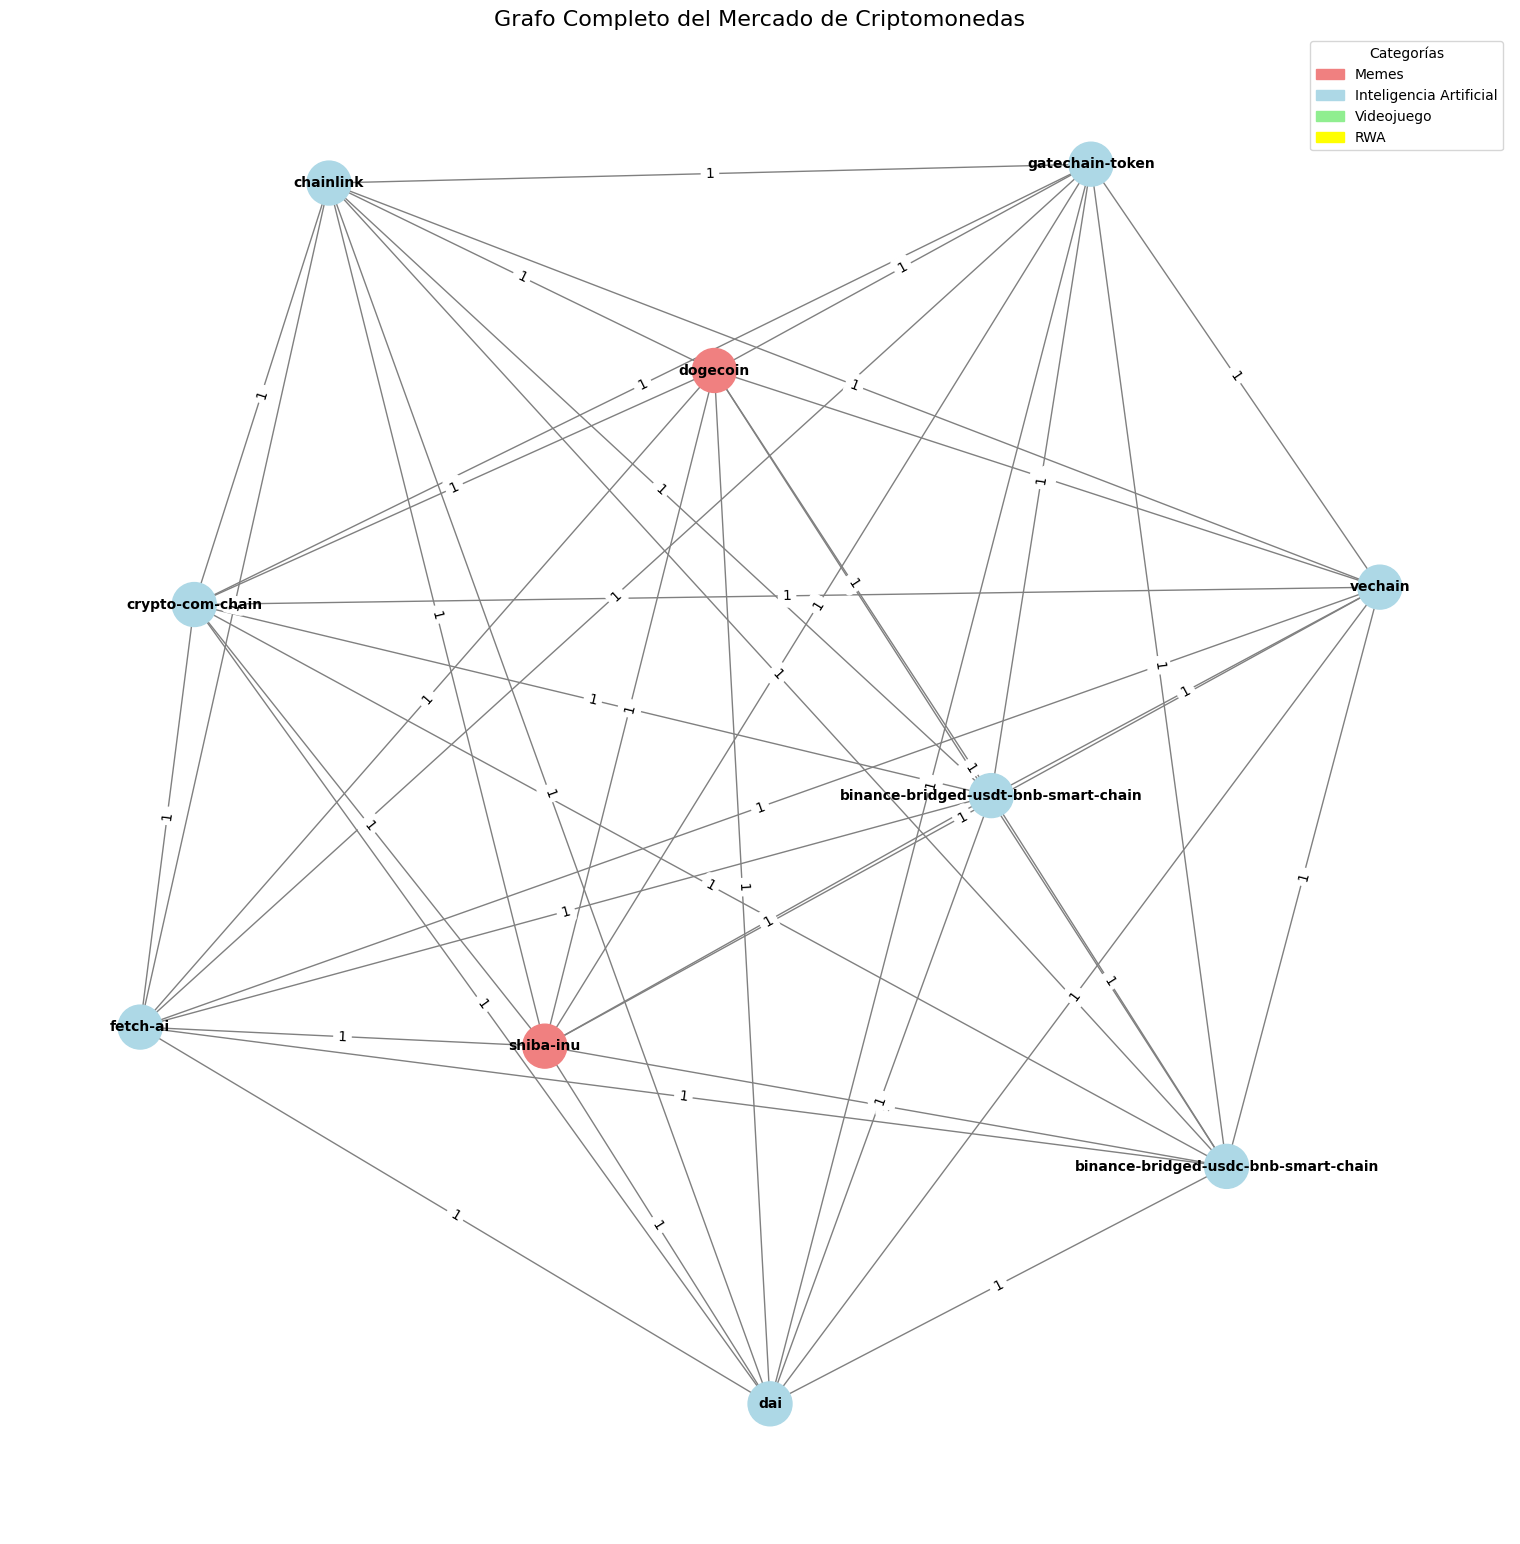

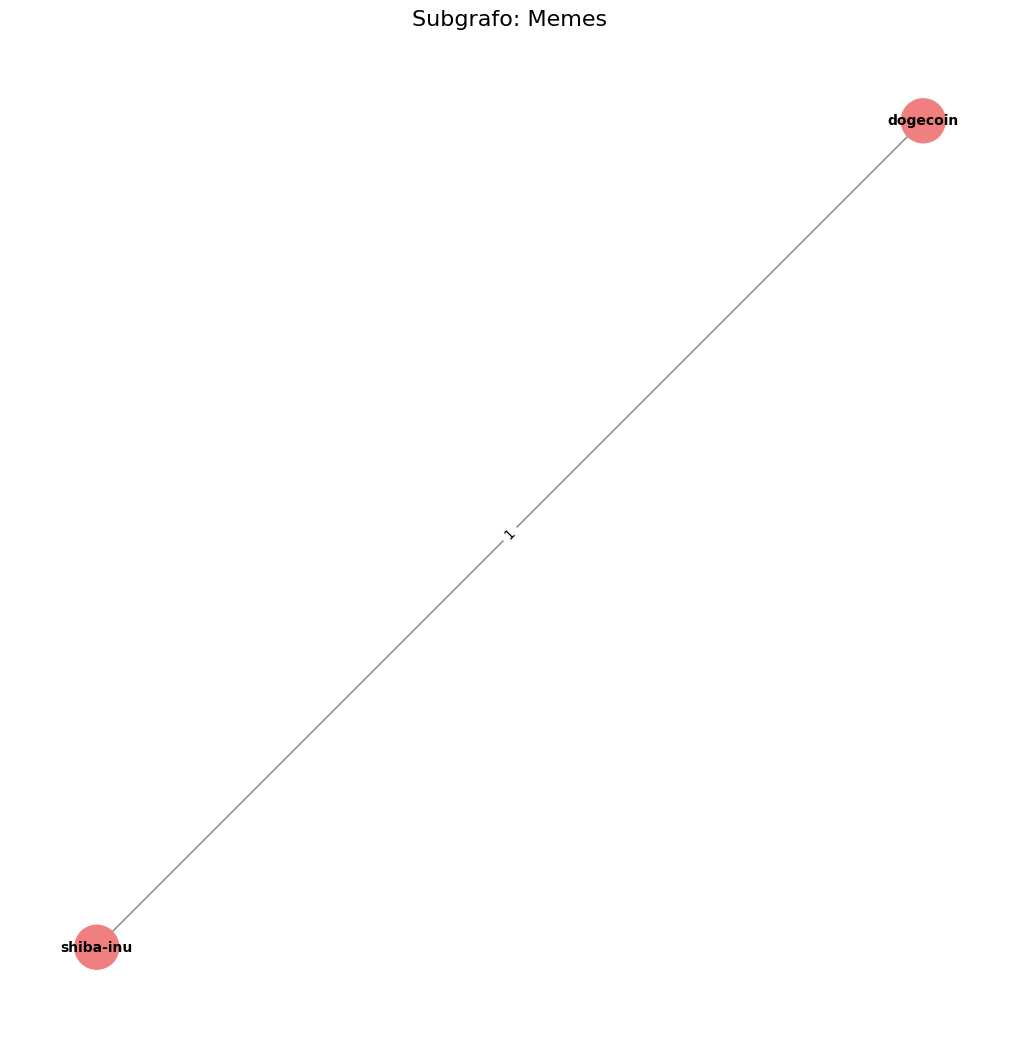

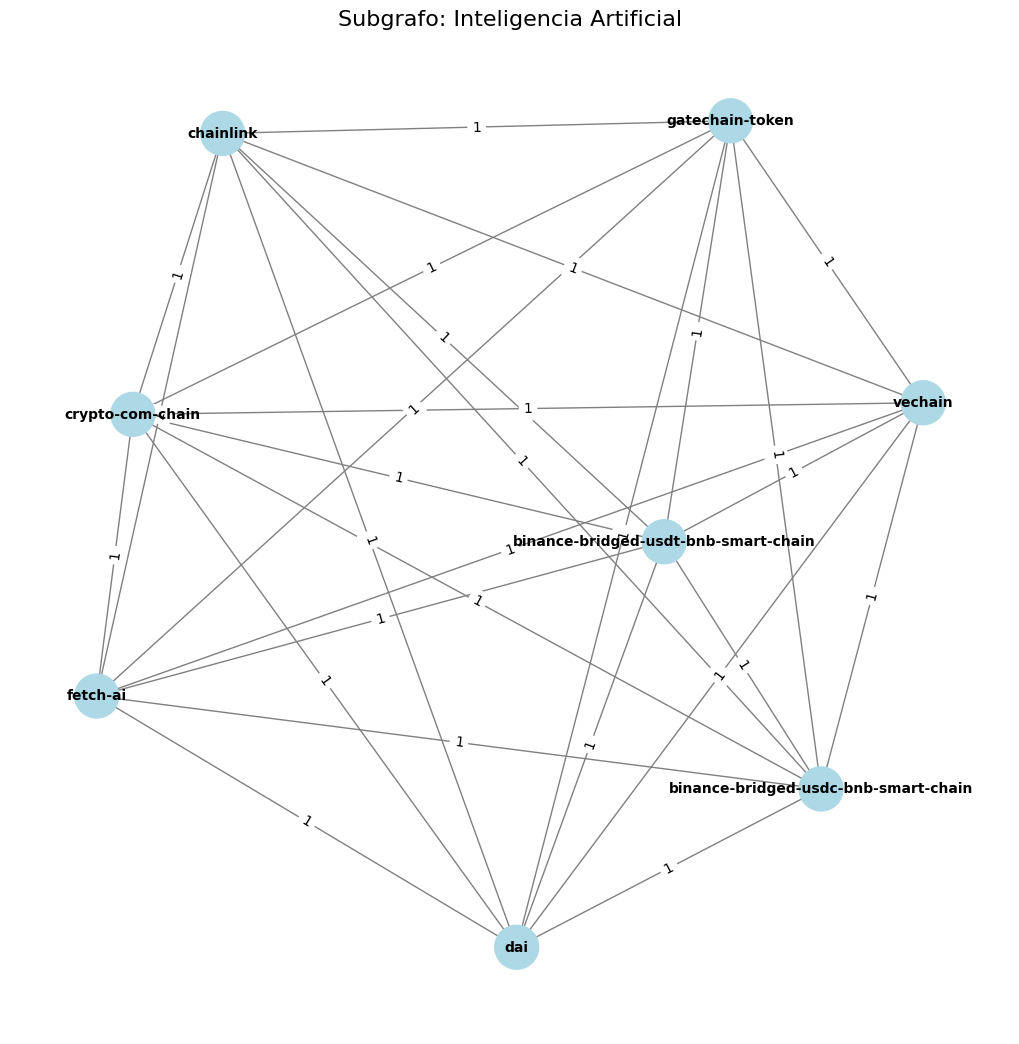

In [ ]:
# dataset generado
df = pd.read_csv("cryptos_filtered.csv") 

G = nx.Graph()

# Colores 
category_colors = {
    'Memes': 'lightcoral',
    'Inteligencia Artificial': 'lightblue',
    'Videojuego': 'lightgreen',
    'RWA': 'yellow'
}

# Agregar nodos con sus atributos
for _, row in df.iterrows():
    G.add_node(row['id'], symbol=row['symbol'], price=row['current_price'], 
               market_cap=row['market_cap'], total_supply=row['total_supply'], 
               category=row['category'])

# Agregar aristas basadas en capitalización de mercado 
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            if abs(row1['market_cap'] - row2['market_cap']) < 1e11:  # Umbral ajustable
                G.add_edge(row1['id'], row2['id'], weight=1)

# Visualización del grafo completo
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.15, iterations=30)  # Ajuste de posiciones para mejorar la legibilidad
node_colors = [category_colors[row['category']] for _, row in df.iterrows()]

# Dibujar el grafo completo
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, font_weight='bold', 
        node_color=node_colors, edge_color='gray')

# Agregar etiquetas en las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el grafo completo
plt.title('Grafo Completo del Mercado de Criptomonedas', fontsize=16)

# Añadir leyenda para los colores
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]
plt.legend(handles=legend_handles, title="Categorías", loc="upper right")

plt.show()

# Dibujar subgrafos por categoría
categories = df['category'].unique()

for category in categories:
    # Crear subgrafo para cada categoría
    subgraph_nodes = df[df['category'] == category]['id'].tolist()
    subgraph = G.subgraph(subgraph_nodes)
    
    # Dibujar el subgrafo
    plt.figure(figsize=(10, 10))
    subgraph_node_colors = [category_colors[category] for _ in subgraph.nodes]
    nx.draw(subgraph, pos, with_labels=True, node_size=1000, font_size=10, font_weight='bold', 
            node_color=subgraph_node_colors, edge_color='gray')

    # Agregar etiquetas en las aristas
    edge_labels = nx.get_edge_attributes(subgraph, 'weight')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)
    
    # Mostrar el subgrafo por categoría
    plt.title(f'Subgrafo: {category}', fontsize=16)
    plt.show()
